# Digit Recognizer

In [1]:
import numpy as np   #Importing Numpy
import pandas as pd  #Importing Pandas

#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

In [2]:
digit_dataframe = pd.read_csv('train.csv') #Importing the database
digit_dataframe.head(20) #Visualize the first 5 rows and the colunms of the database

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Partition of the database into a subset to train the model and to test.

In [3]:
# Database cleaning and preparation for the analysis
from sklearn.model_selection import train_test_split

#Setting up the training and test variables. The test size is 20% of the total amount of data.
X = digit_dataframe.iloc[:,1:].values
Y = digit_dataframe.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)

In [4]:
Y[0:20]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5])

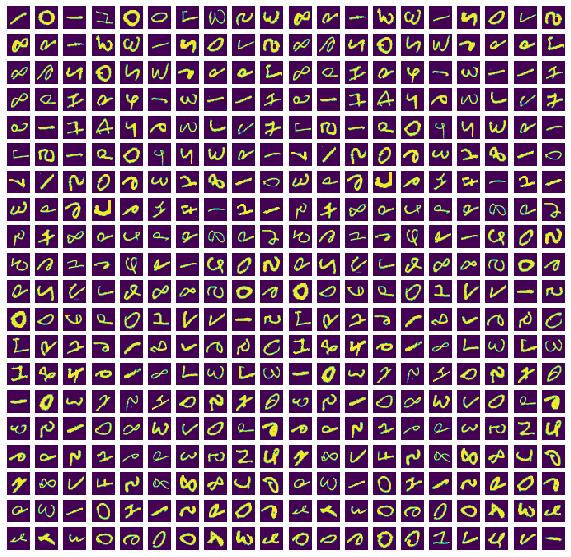

In [5]:
_, axarr = plt.subplots(20,20,figsize=(10,10))
for i in range(20):
    for j in range(20):
        axarr[i,j].imshow(X[int(np.linspace(10*i+j,10*i+j+1,1))].reshape((28,28), order = 'F'))          
        axarr[i,j].axis('off') 

In [6]:
for el in range(10):
    print("There are",len(digit_dataframe[digit_dataframe["label"]==el]),"images labeled as",el)

There are 4132 images labeled as 0
There are 4684 images labeled as 1
There are 4177 images labeled as 2
There are 4351 images labeled as 3
There are 4072 images labeled as 4
There are 3795 images labeled as 5
There are 4137 images labeled as 6
There are 4401 images labeled as 7
There are 4063 images labeled as 8
There are 4188 images labeled as 9


# kNN Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Evaluating the accuracy of the performed analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### We will repeat the same analysis but now with the KNN algorithm

kNN = 3 #I will use this parameter and we see that the accuracy is better than the Logistic regression.
print('The k parameter is:', kNN)
classifier = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
classifier.fit(X_train, Y_train)
Y_pred_knn = classifier.predict(X_test)

c_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
accgoaal_knn = accuracy_score(Y_test, Y_pred_knn)
print(c_matrix_knn)
print("The accuracy goal is:",round(accgoaal_knn*100,2),"%")


#sns.heatmap(c_matrix_knn, annot=True, square=True, cmap = 'Reds_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')

The k parameter is: 3
[[1231    0    3    0    0    2    5    0    1    0]
 [   0 1418    3    1    1    0    4    1    1    0]
 [  12   12 1227    2    0    0    1   17    3    2]
 [   1    1    8 1252    0   13    2    7    8    6]
 [   1   11    0    0 1184    0    3    0    0   37]
 [   1    0    0   16    1 1080   15    0    1    5]
 [   3    1    0    0    2    3 1234    0    0    0]
 [   1   12    7    0    4    0    0 1297    0   13]
 [   4   16    3   30    6   22    7    2 1101   13]
 [   5    2    3    7   15    3    1   28    0 1155]]
The accuracy goal is: 96.66 %


Text(0.5, 1.0, 'k-Nearest Neighbor parameter vs. Accuracy')

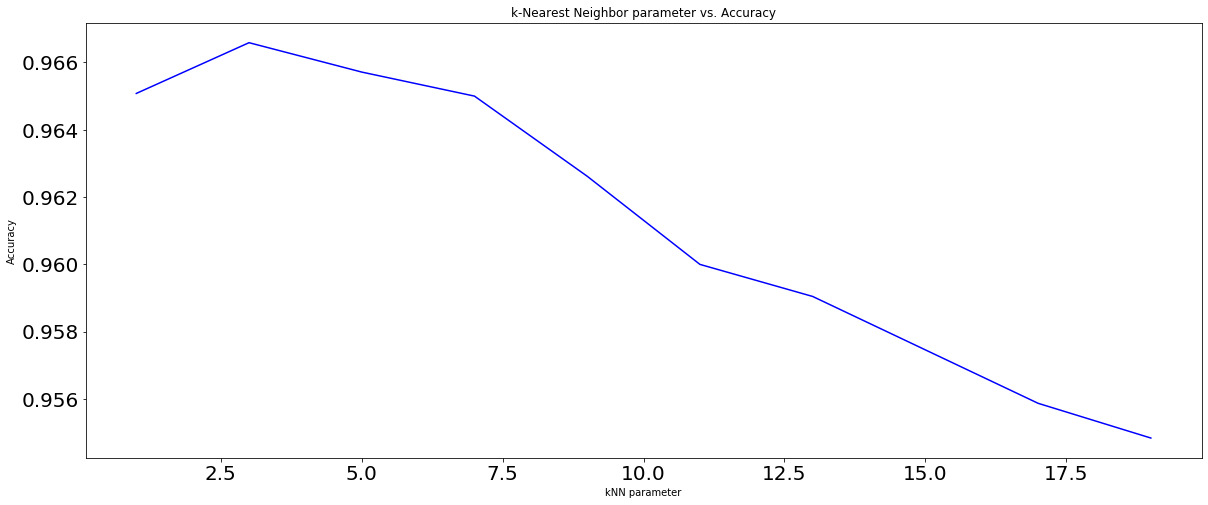

In [8]:
accuracy_kNN_to_plot = []

for k in range(10):
    kNN = 2*k+1 
    classifier = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
    classifier.fit(X_train, Y_train)
    Y_pred_knn = classifier.predict(X_test)
    accuracy_kNN_to_plot.append(accuracy_score(Y_test, Y_pred_knn))

knn_to_plot = [2*k+1 for k in range(10)]
f, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(knn_to_plot, accuracy_kNN_to_plot,color="b")
plt.xticks(size=20,rotation=0)
plt.yticks(size=20,rotation=0)
plt.xlabel('kNN parameter')
plt.ylabel('Accuracy')
plt.title('k-Nearest Neighbor parameter vs. Accuracy')

# Predictions using the kNN algorithm

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 2, 6, 1, 6, 8, 8, 3, 8, 2, 1, 2, 1, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4])

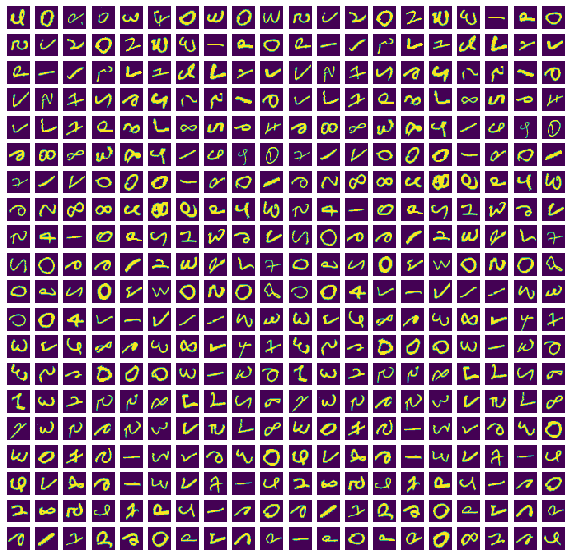

In [10]:
digit_dataframe_test = pd.read_csv('test.csv') #Importing the database
digit_dataframe_test.head() #Visualize the first 5 rows and the colunms of the database

X_to_test = digit_dataframe_test.iloc[:,:].values

_, axarr_to_test = plt.subplots(20,20,figsize=(10,10))
for i in range(20):
    for j in range(20):
        axarr_to_test[i,j].imshow(X_to_test[int(np.linspace(10*i+j,10*i+j+1,1))].reshape((28,28), order = 'F'))          
        axarr_to_test[i,j].axis('off') 
        
Y_prediction_knn = classifier.predict(X_to_test)
Y_prediction_knn[0:100]

#submissions_knn=pd.DataFrame({"ImageId": list(range(1,len(Y_prediction_knn)+1)),
#                         "Label": Y_prediction_knn})
#submissions_knn.to_csv("sample_submission_knn.csv", index=False, header=True)